In [1]:
import inspect
import numpy as np
import pandas

def list_size(variable, callers_local_vars):
    list_size_recursive(' # ', variable, callers_local_vars)

def list_size_recursive(header, variable, callers_local_vars):
    if type(variable) == list or type(variable) == pandas.core.series.Series:
        print(header, 'len(', str([k for k, v in callers_local_vars if v is variable][0]), ') = ', len(variable), sep='')
        if(len(variable) > 0):
            header += '  '
            list_size_recursive(header, variable[0], callers_local_vars)

def nparray_size(variable, callers_local_vars):
    if(type(variable) == np.ndarray):
        print(' # ', str([k for k, v in callers_local_vars if v is variable][0]), '.shape = ', variable.shape, sep='')

def see(variable, all=0):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    print('# ', str([k for k, v in callers_local_vars if v is variable][0]), ' (', type(variable), ')', sep='', end='')
    if all or (type(variable) != list and type(variable) != np.ndarray and type(variable) != pandas.core.series.Series):
        print(' = ', variable, sep='')
    else:
        print('')
    list_size(variable, callers_local_vars)
    nparray_size(variable, callers_local_vars)


Text(0,0.5,'Happiness.Score')

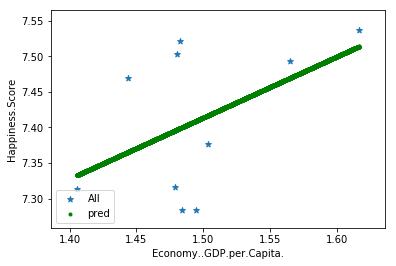

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
d = pd.read_csv('2017.csv')
gdp = np.array(d['Economy..GDP.per.Capita.'])[:10]
happiness = np.array(d['Happiness.Score'])[:10]
lr = linear_model.LinearRegression()
lr.fit(gdp.reshape((-1,1)), happiness)
gdp_test = np.linspace(gdp.min(), gdp.max(), 10000)
happiness_predict = lr.predict(gdp_test.reshape((-1,1)))
fig, ax = plt.subplots()
ax.scatter(gdp, happiness, label='All', marker='*')
ax.scatter(gdp_test, happiness_predict, c='green', marker='.' , label='pred')
ax.legend(loc='lower left')
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Happiness.Score')

In [3]:
import numpy as np

def linear_nn(x, w):
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    return np.matmul(w, x_with_bias.transpose())

In [4]:
def update(w, x_with_bias, y, learning_rate):
    error = np.matmul(w, x_with_bias.transpose()) - y
    # see(x_with_bias, all=0)
    # see(error)
    error_m = error.mean()
    # see(error_m)
    delta_w = - 2 * learning_rate * np.matmul(x_with_bias.transpose(), error)
    # see(w, all=1)
    # see(delta_w, all=1)
    return w + delta_w

In [5]:
def train(x, y, learning_rate, iterNum):    
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    w = np.random.random(x_with_bias.shape[1])
    w_dynamics = []
    for _ in range(iterNum):
        w = update(w, x_with_bias, y, learning_rate)
        w_dynamics.append(w)
    return w, w_dynamics

In [17]:
learning_rate = 0.01
iterNum = 10
trained_w, w_dynamics = train(gdp, happiness, learning_rate, iterNum)

In [7]:
linear_nn(gdp, trained_w)

array([7.79770509, 7.36381395, 7.35815088, 7.6311011 , 7.23821905,
       7.4335886 , 7.35352783, 7.11568289, 7.40266042, 7.37038937])

In [8]:
trained_w[0] * gdp + trained_w[1]

array([7.79770509, 7.36381395, 7.35815088, 7.6311011 , 7.23821905,
       7.4335886 , 7.35352783, 7.11568289, 7.40266042, 7.37038937])

In [9]:
happiness

array([7.53700018, 7.52199984, 7.50400019, 7.49399996, 7.46899986,
       7.37699986, 7.31599998, 7.31400013, 7.28399992, 7.28399992])

In [10]:
trained_w

array([3.23605741, 2.56673742])

In [11]:
lr.coef_

array([0.85857367])

In [12]:
lr.intercept_

6.126043984675304

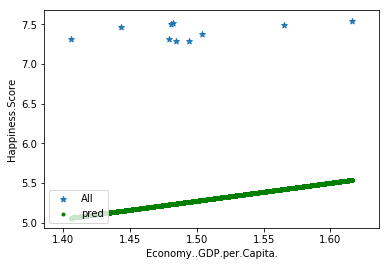

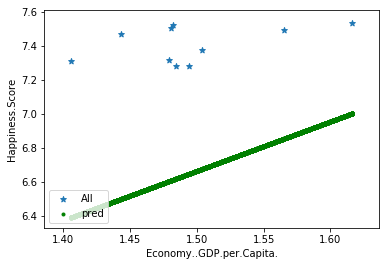

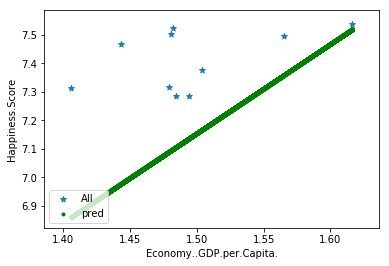

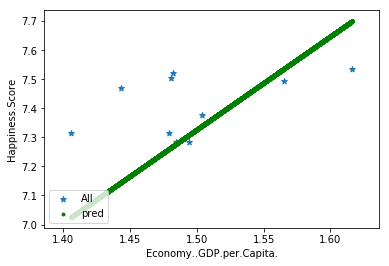

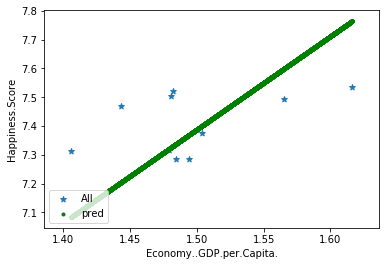

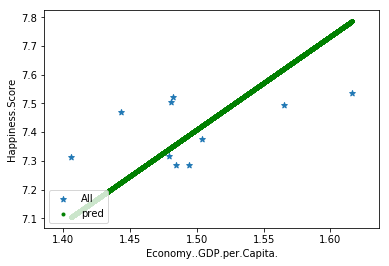

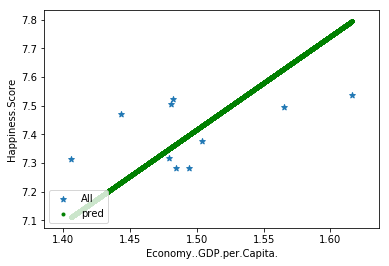

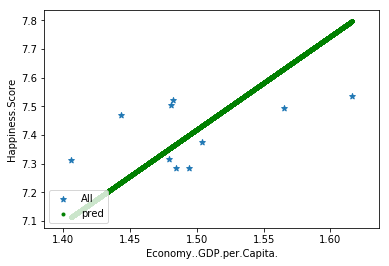

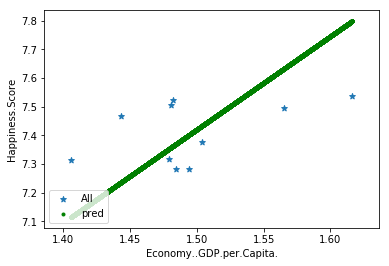

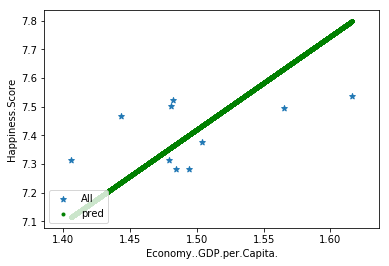

In [18]:
for w in w_dynamics[::]:
    fig, ax = plt.subplots()
    gdp_test = np.linspace(gdp.min(), gdp.max(), 10000)
    happiness_predict = linear_nn(gdp_test, w)
    ax.scatter(gdp, happiness, label='All', marker='*')
    ax.scatter(gdp_test, happiness_predict, c='green', marker='.' , label='pred')
    ax.legend(loc='lower left')
    ax.set_xlabel('Economy..GDP.per.Capita.')
    ax.set_ylabel('Happiness.Score')